# HW3 - Data Analysis & Make Prediction Models

#### Data Science in Korea University, Prof. Jaewoo Kang
#### COSE471, Spring 2018
#### Due : 6/12 (Tues)  11:59 AM [Before Class Start]

## Notice Class schedule
<table>
  <tr>
    <th>Date</th>
    <th>Desc.</th>
  <tr>
    <td>5/29</td>
    <td>MID-TERM EXAM & HW#3 Start Date</td>
  </tr>
  <tr>
    <td>5/31</td>
    <td>HW#2 Late Hand-In Due Date</td>
  </tr>
  <tr>
    <td>6/12</td>
    <td>HW#3 Due Date & HW#4(Project) Start Date</td>
  </tr>
  <tr>
    <td>6/19</td>
    <td>HW#3 Late Hand-In Due Date</td>
  </tr>
  <tr>
    <td>6/21</td>
    <td>FINAL EXAM(NOT FIXED)</td>
  </tr>
  <tr>
    <td>6/26</td>
    <td>HW#4(Project) Due Date(NO LATE HAND-IN)</td>
  </tr>
</table>

## Assignment Credit

### Your assignments are 30% of the total score. The scores for each assignment are as follows.
- __HW#1: 5%__
- __HW#2: 7%__
- __HW#3: 8%__
- __HW#4(Project): 10%__

## Python Assingment HW3 Guide
- You need to fill out your code in ###YOUR CODE HERE### or #TODO.
- The code results should be the same as the results displayed below the code or the format we gave in problem description.
- When solving descriptive problems, both __Korean and English are available.__
- The some libraries are already imported below. __But you should import more.__
    - If you don't have some libraries, install it with pip or conda command. [Google will help you]

## Problem1. Scikit-learn
- Scikit-learn is the most common python library in machine learning.
- Let's port our work from matplotlib to scikit-learn.
- However, not all plots will be handled. We will focus on the most recent data, 2010-2015.

<b>URL:</b> http://scikit-learn.org/
<br/><b>Install guide:</b> http://scikit-learn.org/stable/install.html

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

### Problem 1-1 Applying the linear regression model of scikit-learn to our data
- Information about the various model api is available at the following url:<br/>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;http://scikit-learn.org/stable/modules/classes.html
- Apply regression model for 2000-2015 data only.
- You should use same datasets in HW#2[infant mortality rate and GDP]
- xData : GDP per capita
- yData : Infant morality rate 
- Please print __MSE__ of implemented model.

In [2]:
#load data and filtering data (2000-2015) you can use HW#2 preprocessing code
import copy as cp

tsv = pd.read_csv("GDPperCapByTab.txt", sep = '\t',index_col=0)
tsv = cp.deepcopy(tsv.loc[:,['2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015']])
tsv

for columns in [str(num) for num in range(2000, 2016)]:
    tsv = tsv.dropna(subset=[columns])
    tsv[columns] = tsv[columns].str.replace(",","")

tsv = tsv.apply(pd.to_numeric)

start = ['2000','2005','2010','2015']
new = []

for i, y in enumerate(start):
    if i != 3:
        fiveyears = tsv[[str(num) for num in range (int(y), int(start[i+1])+1)]]
        tsv[y+'-'+start[i+1]] = fiveyears.mean(axis=1)
tsv = tsv.drop([str(num) for num in range(2000, 2016)], axis=1)
tsv = tsv.astype(int)
tsv


#tsv
###YOUR CODE HERE###

,2000-2005,2005-2010,2010-2015
Country,,,
Albania,1788,3641,4286
Algeria,2212,3991,5099
Angola,824,2875,4422
Antigua and Barbuda,10866,14371,13700
Argentina,5377,7725,13234
Armenia,970,2798,3545
Australia,26335,45040,61356
Austria,30465,45269,48589
Azerbaijan,918,3950,7025


In [3]:
intsv = pd.read_csv("InfantMortalityByTab.txt", sep = '\t',index_col=0)
intsv = cp.deepcopy(intsv.loc[:,'2000-2005':])
intsv

,2000-2005,2005-2010,2010-2015
Afghanistan,89.53,79.51,71.12
Albania,20.25,16.11,14.42
Algeria,37.45,34.18,30.28
Angola,116.05,104.35,96.22
Argentina,15.04,14.61,13.69
Armenia,27.00,21.01,13.22
Australia,4.94,4.48,3.96
Austria,4.52,3.78,3.09
Azerbaijan,52.01,41.06,39.60
Bahamas,11.58,10.04,9.06


In [4]:
lr = LinearRegression()

xData=[]
yData=[]

#TODO

gdpindex = tsv.index.values
imrindex = intsv.index.values

k = 0
start = ['2000-2005','2005-2010','2010-2015']

for i in range (0, tsv.shape[0]):
    for j in range (0,3):
        if tsv.index[i] in intsv.index:
            xData.append([k,tsv.iloc[i,j]])
            k = k + 1
            yData.append(intsv.loc[tsv.index[i],start[j]])

lr.fit(xData, yData)
print ("MSE - scikit learn linear regression: ", mean_squared_error(lr.predict(xData), yData))

MSE - scikit learn linear regression:  610.9177074643426


### Problem 1-2 Expanded to polynomial regression
- Let's look at the performance change by changing the degree in 0-9.
- Normalization should also be followed.

*hint: You can use an additional API to implement the polynomial regression model.*

In [5]:
#TODO: import api(s) to implement the polynomial regression model
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

for deg in range(10):
    PolynomialRegression = make_pipeline(PolynomialFeatures(deg), Ridge())

    plr = PolynomialRegression.fit(xData, yData)
    print ("MSE - poly-linear regression; degree=", deg,": ", mean_squared_error(plr.predict(xData), yData))

MSE - poly-linear regression; degree= 0 :  846.175935916066
MSE - poly-linear regression; degree= 1 :  610.9177074643424
MSE - poly-linear regression; degree= 2 :  513.045680294592
MSE - poly-linear regression; degree= 3 :  430.85053392439306
MSE - poly-linear regression; degree= 4 :  381.18166718276194
MSE - poly-linear regression; degree= 5 :  348.22504025754154
MSE - poly-linear regression; degree= 6 :  322.6255922634734
MSE - poly-linear regression; degree= 7 :  304.11348602761575
MSE - poly-linear regression; degree= 8 :  289.69966187742233
MSE - poly-linear regression; degree= 9 :  277.26190758187283


C:\Users\moonyoung\Anaconda3\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 1.4522370039804957e-21 / 1.1102230246251565e-16
  RuntimeWarning)
C:\Users\moonyoung\Anaconda3\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 1.951576080458824e-31 / 1.1102230246251565e-16
  RuntimeWarning)
C:\Users\moonyoung\Anaconda3\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 2.1139084797048256e-41 / 1.1102230246251565e-16
  RuntimeWarning)
C:\Users\moonyoung\Anaconda3\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected.

### Problem 1-3 The change in performance according to the degree can be confirmed. Is performance improvement reliable? Describe the problem of current method.

물론 MSE가 줄어들어서 성능이 향상된 것 처럼 보이지만, degree가 높아질 수록 overfitting의 가능성이 높아진다. overfitting이란 주어진 학습 데이터에만 맞게 모델이 학습되어서, 앞으로 들어올 데이터들에 대한 prediction을 하지 못하는 경우를 말한다.


### Problem 1-4 To solve the problem mentioned above, you must divide the train set and the test set. Try experimenting by assigning 20% of the total sample to a test set.
- Please print MSEs of implemented model, for both of training and test set.
- Degree is the same as the previous experiment, 0-9.

*hint: Implementing it yourself can be a good experience, but using scikit-learn would make it easy to solve this problem.*

In [6]:
#TODO: import API for deviding training and test set
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(xData,yData,test_size=0.2)

for deg in range(10):
    PolynomialRegression = make_pipeline(PolynomialFeatures(deg), Ridge())

    plr = PolynomialRegression.fit(x_train, y_train)
    print ("MSE - sklearn poly-linear regression; degree=", deg,"\n\ttrain: ", mean_squared_error(plr.predict(x_train), y_train), ",\tval: ", mean_squared_error(plr.predict(x_val), y_val))

MSE - sklearn poly-linear regression; degree= 0 
	train:  823.6737940416959 ,	val:  941.0099704170499
MSE - sklearn poly-linear regression; degree= 1 
	train:  588.9967555568235 ,	val:  704.8827172372723
MSE - sklearn poly-linear regression; degree= 2 
	train:  498.53870575869877 ,	val:  576.1056070294687
MSE - sklearn poly-linear regression; degree= 3 
	train:  413.44758841348363 ,	val:  506.15598154510326
MSE - sklearn poly-linear regression; degree= 4 
	train:  355.1741871364817 ,	val:  530.1327588752478
MSE - sklearn poly-linear regression; degree= 5 
	train:  322.26388429901704 ,	val:  785.04144909888
MSE - sklearn poly-linear regression; degree= 6 
	train:  295.8306246306757 ,	val:  6209.753441350999
MSE - sklearn poly-linear regression; degree= 7 
	train:  281.7725853321504 ,	val:  87839.76872627393
MSE - sklearn poly-linear regression; degree= 8 
	train:  264.68807157668203 ,	val:  1746674.8626372677
MSE - sklearn poly-linear regression; degree= 9 
	train:  250.93280691530708 ,

C:\Users\moonyoung\Anaconda3\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 2.156528928745028e-21 / 1.1102230246251565e-16
  RuntimeWarning)
C:\Users\moonyoung\Anaconda3\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 3.0062771378767245e-31 / 1.1102230246251565e-16
  RuntimeWarning)
C:\Users\moonyoung\Anaconda3\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 3.1574945166669976e-41 / 1.1102230246251565e-16
  RuntimeWarning)
C:\Users\moonyoung\Anaconda3\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected.

### Problem 1-5 We currently use only one feature called GDP per capita. If you want to improve performance, you will need to add features. Present other valid features and describe why you think so. 
- You only need to collect the URL. You do not need to collect data or conduct further experiments.

### YOUR ANSWER HERE ###

## Problem2. Regression Model
## -Amzon stock price prediction.

### Problem 2-1
- In this problem you will predict stock price only with price related data. People usually call it as Technical analysis.
- Find best combination of parameters to predict next day price.
- __Your MSE loss should be lower than 30.__

In [7]:
# TODO : load data 'AMZN.csv'
raw_data = pd.read_csv("AMZN.csv",sep=',')

In [43]:
raw_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1997-05-15,2.437500,2.500000,1.927083,1.958333,1.958333,72156000
1,1997-05-16,1.968750,1.979167,1.708333,1.729167,1.729167,14700000
2,1997-05-19,1.760417,1.770833,1.625000,1.708333,1.708333,6106800
3,1997-05-20,1.729167,1.750000,1.635417,1.635417,1.635417,5467200
4,1997-05-21,1.635417,1.645833,1.375000,1.427083,1.427083,18853200


<br/><br/>
- We will use only __one kind of variable__ for __last 'lookback' days__ to predict next day close price.<br/>
For example, if we set lookback days as 5, and use close price for our independent variable.<br/><br/>
Close price of [1997-05-15, 1997-05-16, 1997-05-19, 1997-05-20, 1997-05-21] --> predict [1997-05-22] <br/><br/>

In [9]:
"""
TODO : make get_concated_data function.
       this function create x and y data

@Function
get_concated_data

@Inputs
__
raw_data : dataframe, full Amazon stock data.


@Returns
___

x_data 
    : <class 'numpy.ndarray'>
    : crteated data should in shape of [len(raw_data)-lookback, lookback]
    : x_data should be made based on 'col_name', parameters of the function, variable we will use
    
y_data 
    : <class 'numpy.ndarray'>
    : crteated data should in shape of [len(raw_data)-lookback]
    : y should be always made based on 'Close'.
"""

"\nTODO : make get_concated_data function.\n       this function create x and y data\n\n@Function\nget_concated_data\n\n@Inputs\n__\nraw_data : dataframe, full Amazon stock data.\n\n\n@Returns\n___\n\nx_data \n    : <class 'numpy.ndarray'>\n    : crteated data should in shape of [len(raw_data)-lookback, lookback]\n    : x_data should be made based on 'col_name', parameters of the function, variable we will use\n    \ny_data \n    : <class 'numpy.ndarray'>\n    : crteated data should in shape of [len(raw_data)-lookback]\n    : y should be always made based on 'Close'.\n"

In [10]:
# We will use only one kind of variable as a time series data
def get_concated_data(raw_data, col_name, lookback):
    x_datas = list()
    y_datas = list()
    # col_name : Variable to be used
    col_data = raw_data[col_name].values
    
    # aggregate target variable data for length of lookback days
    
    close_data = raw_data['Close'].values
    
    for i in range (lookback,len(col_data)):
        new = []
        for j in range (0,lookback):
            new.append(col_data[i-lookback+j])
        #print(new)
        x_datas.append(new)
        y_datas.append(close_data[i])
    ##########################    
   
    #print(x_datas[:10])
    x_data = np.concatenate(x_datas,axis=0)
    y_data = np.asarray(y_datas)
    x_data = np.reshape(x_data,(-1,lookback))

    return x_data, y_data

In [11]:
"""
TODO : make split_data function which split train / test (last 60 data, approximately 3 month)

@Function
split_data

@Inputs
__
data : numpy array
     
@Returns
___
x_train, x_test, y_train, y_test
    :<class 'numpy.ndarray'>

"""

"\nTODO : make split_data function which split train / test (last 60 data, approximately 3 month)\n\n@Function\nsplit_data\n\n@Inputs\n__\ndata : numpy array\n     \n@Returns\n___\nx_train, x_test, y_train, y_test\n    :<class 'numpy.ndarray'>\n\n"

In [82]:
def split_data(x,y):
    
    x_train, x_test,y_train, y_test = train_test_split(x,y,test_size=0.2,shuffle=False)
    
    ###########################
    return x_train, x_test, y_train, y_test

In [83]:
x, y = get_concated_data(raw_data, 'Close', 5)
x[:10],y[:10]

(array([[1.958333, 1.729167, 1.708333, 1.635417, 1.427083],
        [1.729167, 1.708333, 1.635417, 1.427083, 1.395833],
        [1.708333, 1.635417, 1.427083, 1.395833, 1.5     ],
        [1.635417, 1.427083, 1.395833, 1.5     , 1.583333],
        [1.427083, 1.395833, 1.5     , 1.583333, 1.53125 ],
        [1.395833, 1.5     , 1.583333, 1.53125 , 1.505208],
        [1.5     , 1.583333, 1.53125 , 1.505208, 1.5     ],
        [1.583333, 1.53125 , 1.505208, 1.5     , 1.510417],
        [1.53125 , 1.505208, 1.5     , 1.510417, 1.479167],
        [1.505208, 1.5     , 1.510417, 1.479167, 1.416667]]),
 array([1.395833, 1.5     , 1.583333, 1.53125 , 1.505208, 1.5     ,
        1.510417, 1.479167, 1.416667, 1.541667]))

In [84]:
x_train, x_test, y_train, y_test = split_data(x, y)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((4226, 5), (4226,), (1057, 5), (1057,))

### <br/>Problem 2-2 Find best parameter combination 
- You can choose which __columns to use__ as variable for __how many days__, and in which __polynomial space.__
- Find the best combination of parameters to predict next day price.
- __Find combination which makes MSE loss for train data lower than 6.__

In [85]:
# TODO : complete run_regression function
# Hint : use api i gave below

In [87]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

def run_regression(raw_data, column_name, lookback_days, poly_degree):
    # performing regression analysis with specified parameters
    x, y = get_concated_data(raw_data, column_name, lookback_days)
    
    x_train, x_test, y_train, y_test = split_data(x, y)

    ##### Your Code Here ####
    
    PolynomialRegression = make_pipeline(PolynomialFeatures(poly_degree), linear_model.Ridge())

    model = PolynomialRegression.fit(x_train, y_train)
    
    test_pred = model.predict(x_test)
    prediction = mean_squared_error(model.predict(x_test), y_test)
    
    #if prediction <900: #?
    print("column_name : "+column_name+", lookback_days : %d, poly_degree : %d"%(lookback_days,poly_degree))
    print ("MSE - Train %.4f"%mean_squared_error(model.predict(x_train), y_train))
    print ("MSE - Test %.4f"%prediction)
    
    return test_pred, y_test

In [103]:
# TODO : run experiment with various combination

columns = ['Open','High','Low','Close','Adj Close']
for i in range (2, 50):
    for j in range (5,6):
        for k in columns:
            test_pred, y_test = run_regression(raw_data, column_name=k, lookback_days=i, poly_degree=j)



C:\Users\moonyoung\Anaconda3\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 2.7022393355034054e-29 / 1.1102230246251565e-16
  RuntimeWarning)
C:\Users\moonyoung\Anaconda3\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 3.0345803294029023e-29 / 1.1102230246251565e-16
  RuntimeWarning)
C:\Users\moonyoung\Anaconda3\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 2.711260298675045e-29 / 1.1102230246251565e-16
  RuntimeWarning)
C:\Users\moonyoung\Anaconda3\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected.

column_name : Open, lookback_days : 2, poly_degree : 5
MSE - Train 13.5600
MSE - Test 635049234.1292
column_name : High, lookback_days : 2, poly_degree : 5
MSE - Train 10.5307
MSE - Test 1345528595.3348
column_name : Low, lookback_days : 2, poly_degree : 5
MSE - Train 10.1892
MSE - Test 447410917.5906
column_name : Close, lookback_days : 2, poly_degree : 5
MSE - Train 945.3321
MSE - Test 542071814201.5020
column_name : Adj Close, lookback_days : 2, poly_degree : 5
MSE - Train 945.3321
MSE - Test 542071814201.5020
column_name : Open, lookback_days : 3, poly_degree : 5
MSE - Train 13.2059
MSE - Test 1535785037.3267
column_name : High, lookback_days : 3, poly_degree : 5
MSE - Train 9.9307
MSE - Test 5583573831.4327
column_name : Low, lookback_days : 3, poly_degree : 5
MSE - Train 9.7088
MSE - Test 2030828773.3531
column_name : Close, lookback_days : 3, poly_degree : 5
MSE - Train 7.7519
MSE - Test 331457318.5896
column_name : Adj Close, lookback_days : 3, poly_degree : 5
MSE - Train 7.751

KeyboardInterrupt: 

Write Combination that you've found. (Train loss lower than 6) <br/><br/>
Variable :       Open<br/>
Lookback :       20<br/>
Poly_degree :       3<br/>

column_name : Open, lookback_days : 20, poly_degree : 3
MSE - Train 2.3346
MSE - Test 21148798.8013

### Problem 2-3 Overfitting & Underfitting
1. Briefly explain about the concept of overfitting and underftting with proper example that you can find from experiment above.
2. In the above problem desciption, I set your goal as fiding best parameters for total data loss. What is wrong with it? 

### YOUR ANSWER HERE ###

 overfitting이란, train data에 너무 딱 맞게 모델이 학습된 나머지, 앞으로 들어올 실제 데이터(test data) 에 대해 모델이 제대로 예측하지 못하는 경우를 이른다. 이와 반대로 underfitting이란, 모델이 너무 단순하거나 하여 train data에서 적합한 parameter를 추출하지 못해서, 앞으로 들어올 실제 데이터에 대해 모델이 제대로 예측하지 못하는 경우를 이른다.
 (underfitting 예시: column_name : Open, lookback_days : 2, poly_degree : 0, MSE - Train 7673.2968, MSE - Test 500960.5448)
 위에서 적은 example으로 넘어가보자. example을 구하는 기준은 'train data에 대한 loss 가 6보다 작은 경우의 parameter'이다. 그러나 이 모델이 데이터에 너무 딱 맞게 학습된 나머지, 앞으로 들어올 test data에 대해서는 극악의 예측률을 보이고 있음을 볼 수 있다 (test mse = 8003180.6563). 그래서 best parameter를 선택하는 기준은 test data 에 대한 mse로 하는 편이 더 좋을 것 같고, 이를 더 정확히 하기 위해서는 cross validation등의 방법을 이용한다면 좋을 것 같다.

### Problem 2-4 Visualization
- Visualize your predicton.
- You can use code below with proper variable.
- __Your best model's prediction --> best_pred.__

In [91]:
# TODO : Assign your best prediction for test data to best_pred
best_pred, y_test = run_regression(raw_data, column_name='Close', lookback_days=2, poly_degree=1)

column_name : Close, lookback_days : 2, poly_degree : 1
MSE - Train 8.6591
MSE - Test 178.9833


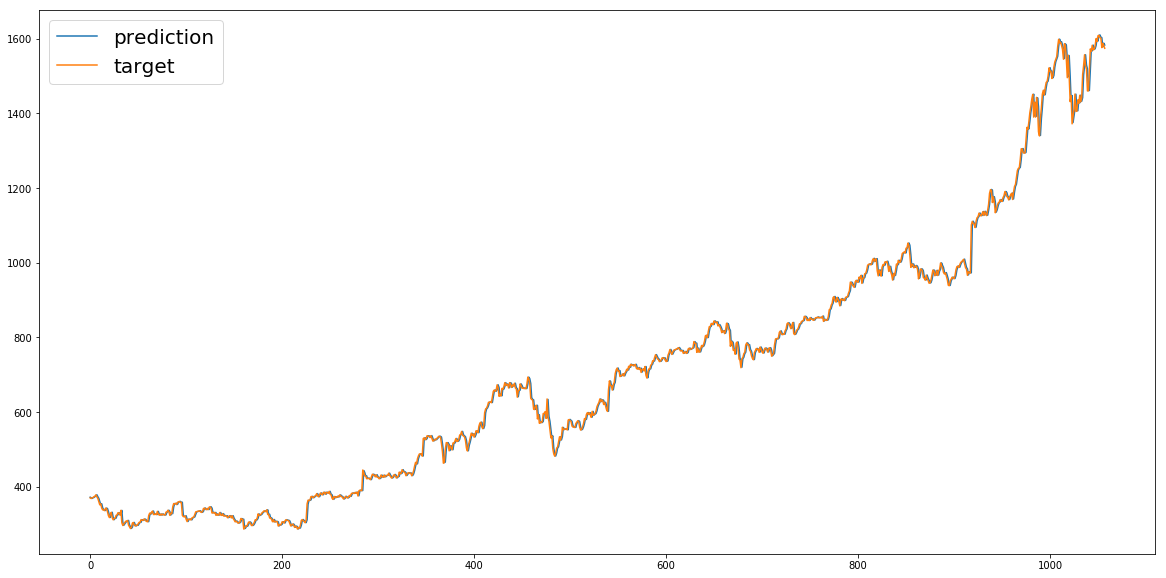

In [92]:
from matplotlib import pyplot as plt

plt.figure(figsize=(20,10))
plt.plot(best_pred, label='prediction')
plt.plot(y_test, label='target')
plt.legend(loc='best', fontsize=20)
plt.show()

## Problem3. Classification Model : Sentiment Analysis (NLP)
- Use amazon_cells_labelled.tsv data to solve your problem3

In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Problem 3-1 Load Data
- Load amazon_cells_labelled.tsv and make pandas dataframe.

In [94]:
amazon_review = pd.read_csv("amazon_cells_labelled.tsv",sep='\t')
amazon_review

,Review,Sentiment
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1
5,I have to jiggle the plug to get it to line up...,0
6,If you have several dozen or several hundred c...,0
7,If you are Razr owner...you must have this!,1
8,"Needless to say, I wasted my money.",0
9,What a waste of money and time!.,0


### Problem 3-2 BOW (Bag Of Word)
- Finish your make_review_bow function.
- Make BOW using make_review_bow function.
- Make BOW_df using BOW you made.
    
*hint: Refer to Tutorial code below*

In [70]:
from sklearn.feature_extraction.text import CountVectorizer

In [71]:
#BOW Tutorial

example_doc = [
    'This is the first sentence.',
    'Creating BOW step by step.',
    'This is the last sentence.'
]

print ('# Original text is \n', '\n'.join(example_doc))

vectorizer = CountVectorizer(min_df=0)

vectorizer.fit(example_doc)
x = vectorizer.transform(example_doc)
print ('# Word Vector\n', x)

bow = x.toarray()

bow_df = pd.DataFrame(bow, columns=vectorizer.get_feature_names())
bow_df

# Original text is 
 This is the first sentence.
Creating BOW step by step.
This is the last sentence.
# Word Vector
   (0, 3)	1
  (0, 4)	1
  (0, 6)	1
  (0, 8)	1
  (0, 9)	1
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (1, 7)	2
  (2, 4)	1
  (2, 5)	1
  (2, 6)	1
  (2, 8)	1
  (2, 9)	1


,bow,by,creating,first,is,last,sentence,step,the,this
0,0,0,0,1,1,0,1,0,1,1
1,1,1,1,0,0,0,0,2,0,0
2,0,0,0,0,1,1,1,0,1,1


In [100]:
"""
@Function
make_review_bow

@Inputs
__
data : data frame
    Amajon review data frame

@Returns
___
vectorizer 
    :<class 'sklearn.feature_extraction.text.CountVectorizer'> 
    
bow 
    : <class 'scipy.sparse.csr.csr_matrix'>
"""

def make_review_bow(data):    
    vectorizer = CountVectorizer(min_df=0)
    ###YOUR CODE HERE###
    
    array = data['Review'].tolist()
    
    vectorizer.fit(array)
    x = vectorizer.transform(array)
    print ('# Word Vector\n', x)
    
    bow = x.toarray()
    #print(bow)
    
    return vectorizer, bow

In [101]:
vectorizer, bow = make_review_bow(amazon_review)
bow_df = pd.DataFrame(bow, columns=vectorizer.get_feature_names())
bow_df

# Word Vector
   (0, 233)	1
  (0, 367)	1
  (0, 653)	1
  (0, 711)	1
  (0, 762)	1
  (0, 814)	2
  (0, 854)	1
  (0, 857)	1
  (0, 993)	1
  (0, 1074)	1
  (0, 1212)	1
  (0, 1491)	1
  (0, 1604)	1
  (0, 1609)	1
  (0, 1640)	1
  (0, 1702)	1
  (0, 1714)	1
  (0, 1766)	1
  (1, 259)	1
  (1, 569)	1
  (1, 715)	1
  (1, 1733)	1
  (2, 653)	1
  (2, 721)	1
  (2, 864)	1
  :	:
  (997, 989)	1
  (997, 1081)	1
  (997, 1189)	1
  (998, 453)	1
  (998, 829)	1
  (998, 852)	1
  (998, 854)	1
  (998, 993)	1
  (998, 1109)	1
  (998, 1221)	1
  (998, 1323)	1
  (998, 1602)	1
  (998, 1604)	2
  (998, 1614)	1
  (999, 95)	1
  (999, 240)	1
  (999, 243)	1
  (999, 1065)	1
  (999, 1081)	1
  (999, 1105)	1
  (999, 1604)	1
  (999, 1699)	1
  (999, 1812)	1
  (999, 1824)	1
  (999, 1843)	1


,10,100,11,12,13,15,15g,18,20,2000,...,wrongly,year,years,yell,yes,yet,you,your,z500a,zero
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Problem 3-3 Split Data : Train / Test
- Split your data (1000 reviews) __Train: 800 / Test: 200__ randomly. 
    - X: bow_df of Review / Y: Sentiment[(int type) 1:pos, 0:neg] 
    - __Make sure your X data match to Y data in random shuffling.__

*hint: Implementing it yourself can be a good experience, but using scikit-learn would make it easy to solve this problem.*

In [105]:
###YOUR CODE HERE###

x_train, x_test,y_train, y_test = train_test_split(bow_df,amazon_review['Sentiment'].tolist(),test_size=0.2,shuffle=True)

### Problem 3-4 Model by SGDClassifier
- Use SGDClassifer to make you classficiation model.
- Train your model using train data and report test score using test data.

*hint: Refer to http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html*

In [106]:
from sklearn.linear_model import SGDClassifier

In [112]:
###YOUR CODE HERE###

clf = linear_model.SGDClassifier()
clf.fit(x_train,y_train)


C:\Users\moonyoung\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False)

In [113]:
sgdScore = clf.score(x_test, y_test, sample_weight=None)
print ("Model Accuracy: %f" % sgdScore)

Model Accuracy: 0.790000


### Problem 3-5 Model by Multinomial Naive Bayes
- Use MultinomialNB to make you classficiation model.
- Train your model using train data and report test score using test data.

*hint: Refer to http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html *

In [115]:
from sklearn.naive_bayes import MultinomialNB

In [120]:
###YOUR CODE HERE###

clf = MultinomialNB()
clf.fit(x_train, y_train)


MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [121]:
nbScore = clf.score(x_test, y_test, sample_weight = None)
print ("Model Accuracy: %f" % nbScore)

Model Accuracy: 0.860000


### Problem 3-6 Select the Best Model with 4 fold Cross Validation
- Split your data (1000 reviews) __Train: 600 / Validation: 200 / Test: 200__ randomly. 
    - X: bow_df of Review / Y: Sentiment[(int type) 1:pos, 0:neg] 
    - __Make sure your X data match to Y data in random shuffling.__
- Choose model you want to use(SGD or NB or both) and give us reason why you choose it.
- Train your model with different parameters using train data and check your model performance by cross validataion score.
- Choose your best model using cross validataion sets and report your test score.

In [199]:
#Split Data
###YOUR CODE HERE###

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

lista = amazon_review['Sentiment'].values
#listsen = np.asarray(lista, dtype='int')

x_trainvalid, x_test, y_trainvalid, y_test = train_test_split(bow_df.values,lista,test_size=0.2,shuffle=True)

#print(y_trainvalid[:10])


kf = KFold(n_splits = 4)
for train_index, val_index in kf.split(x_trainvalid):
    x_train, x_valid = x_trainvalid[train_index], x_trainvalid[val_index]
    y_train, y_valid = y_trainvalid[train_index], y_trainvalid[val_index]
    clf1 = MultinomialNB()
    clf2 = SGDClassifier()
    clf1.fit(x_train, y_train)
    clf2.fit(x_train, y_train)
    sgdscore = clf1.score(x_valid, y_valid, sample_weight=None)
    nbscore = clf2.score(x_valid, y_valid, sample_weight=None)
    print("SGD accuracy : %f, NB accuracy : %f"%(sgdscore, nbscore))
    

SGD accuracy : 0.810000, NB accuracy : 0.800000
SGD accuracy : 0.820000, NB accuracy : 0.780000
SGD accuracy : 0.800000, NB accuracy : 0.760000
SGD accuracy : 0.850000, NB accuracy : 0.800000


C:\Users\moonyoung\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


### YOUR ANSWER HERE [reason why you choose that model] ###

4 fold cross validation을 한 결과, 3번의 fold에서는 모두 SGD model의 accuracy가 NB model의 accuracy보다 높게 나온 것을 확인할 수 있었다. 그러므로 SGD model이 더 낫다고 판단하였다. 
사실 이 문제에서 word vector 각각에 담긴 word들은 서로 dependency를 가지고 있다. 각각의 feature들을 독립적으로 취급하는 multinomial naive bayes와 달리, SGD 모델은 각각 feature간의 dependency를 더 잘 파악할 수 있기 때문에 이 데이터에서 더 나은 정확도를 보인다고 생각한다.

In [200]:
###YOUR CODE HERE###

In [201]:
###YOUR CODE HERE###

In [202]:
clf.fit(x_trainvalid, y_trainvalid)
score = clf1.score(x_test, y_test, sample_weight = None)
print ("Model Accuracy: %f" % score)

Model Accuracy: 0.815000


## Problem4. Clustering Model
- In this problem, you will cluster news article documents after converting them to TF-IDF vectors.
- All results may be different from the example results depending on your choice.

In [128]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
from sklearn.manifold import MDS

### Problem 4-1 Pick 3 Categories you want and download

In [129]:
"""

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']
 
"""
categories = ['comp.graphics', 'rec.autos', 'talk.politics.guns'
                    ]

In [130]:
dataset = fetch_20newsgroups(subset='test', categories=categories,
                             shuffle=True, random_state=45)
print("%s" % dataset.description)
print("%d documents" % len(dataset.data))
print("%d categories" % len(dataset.target_names))

INFO:sklearn.datasets.twenty_newsgroups:Downloading 20news dataset. This may take a few minutes.
INFO:sklearn.datasets.twenty_newsgroups:Downloading dataset from https://ndownloader.figshare.com/files/5975967 (14 MB)


the 20 newsgroups by date dataset
1149 documents
3 categories


### Problem 4-2 Convert the documents to a tf-idf matrix 
- refer to http://mlwiki.org/index.php/TF-IDF
- You can use sklearn.
- Set your own hyperparams.

In [132]:
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(dataset['data'])
tfidf_matrix

<1149x23221 sparse matrix of type '<class 'numpy.float64'>'
	with 175027 stored elements in Compressed Sparse Row format>

### Problem 4-3 Cluster the documents using K-means
- You can use sklearn
- Set your own hyperparams

In [133]:
num_clusters = 3
km = KMeans(n_clusters = num_clusters).fit(tfidf_matrix)
#TODO
clusters = km.labels_.tolist()
print(clusters[:10])

[1, 0, 1, 0, 0, 2, 0, 0, 1, 0]


### Problem 4-4 Visualize document clusters
- You can use sklearn
- It may take a long time to compile

In [134]:
#USE THIS -DO NOT CHANGE-
dist = 1 - cosine_similarity(tfidf_matrix)
MDS()
mds = MDS(n_components=2, dissimilarity="precomputed", random_state=1)
pos = mds.fit_transform(dist)
xs, ys = pos[:, 0], pos[:, 1]

cluster_colors = {0: '#1b9e77', 1: '#d95f02', 2: '#7570b3'}
cluster_names = categories

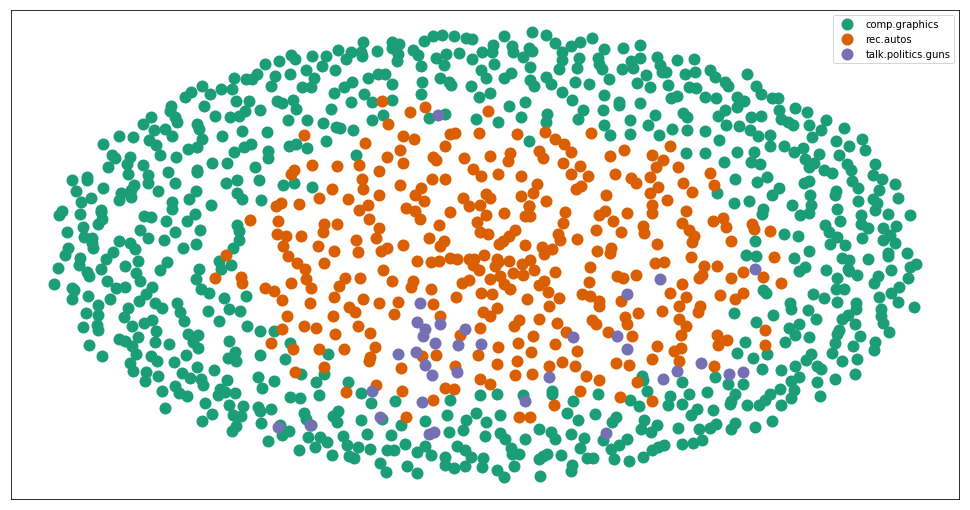

In [135]:
def visualize_clusters(xs, ys, clusters, cluster_names, cluster_colors):
    %matplotlib inline 
    df = pd.DataFrame(dict(x=xs, y=ys, label=clusters)) 
    groups = df.groupby('label')
    fig, ax = plt.subplots(figsize=(17, 9))
    ax.margins(0.05) 
    for name, group in groups:
        ax.plot(group.x, group.y, marker='o', linestyle='', ms=12, 
                label= cluster_names[name],
                color= cluster_colors[name],
                mec='none')
        ax.set_aspect('auto')
        ax.tick_params(\
            axis= 'x',          
            which='both',      
            bottom='off',      
            top='off',         
            labelbottom='off')
        ax.tick_params(\
            axis= 'y',         
            which='both',     
            left='off',     
            top='off',      
            labelleft='off')
    ax.legend(numpoints=1) 
    plt.show() 

visualize_clusters(xs, ys, clusters, cluster_names, cluster_colors)